## **SCORING - Monoamine Oxidase B**
#### **Micha Birklbauer 2021-10-08**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/PIAScore.py", "PIAScore.py")

'PIAScore.py'

In [2]:
import pandas as pd
from PIAScore import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Salt_Bridge:GLU84B,Hydrophobic_Interaction:GLU84B,Halogen_Bond:GLN206B,Hydrophobic_Interaction:LEU328B,Water_Bridge:THR201B,Halogen_Bond:SER200B,Hydrophobic_Interaction:TYR435A,Hydrogen_Bond:PRO102B,...,Pi-Stacking:PHE168B,Pi-Stacking:TYR326B,Hydrogen_Bond:ASN203B,Hydrophobic_Interaction:GLN206A,Hydrophobic_Interaction:THR201B,Hydrophobic_Interaction:THR202B,Water_Bridge:GLU84B,Hydrophobic_Interaction:PRO104B,Hydrophobic_Interaction:PHE103B,LABEL
0,1,CHEMBL583128|actives_final|sdf|78,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
1,2,CHEMBL583128|actives_final|sdf|79,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
2,3,ZINC32575615|decoys_final|sdf|262,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,inactive
3,4,CHEMBL45069|actives_final|sdf|163,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,active
4,5,ZINC36683565|decoys_final|sdf|17,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,278,ZINC39059368|decoys_final|sdf|85,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,inactive
278,279,ZINC43542940|decoys_final|sdf|181,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,inactive
279,280,CHEMBL589765|actives_final|sdf|77,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active
280,281,CHEMBL522271|actives_final|sdf|3,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(282, 62) 113


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(71, 62) 24


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(89, 62) 31


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:GLN206B,2.373671e-01,0.230088,0.467456
1,2,Hydrogen_Bond:TYR326B,2.329685e-01,0.743363,0.976331
2,3,Hydrophobic_Interaction:PHE168B,2.289365e-01,0.619469,0.390533
3,4,Hydrophobic_Interaction:PHE99B,1.807614e-01,0.097345,0.278107
4,5,Hydrogen_Bond:THR201B,1.622244e-01,0.831858,0.994083
5,6,Hydrophobic_Interaction:LEU167B,1.584018e-01,0.460177,0.301775
6,7,Hydrogen_Bond:ILE199B,1.450490e-01,0.026549,0.171598
7,8,Water_Bridge:THR201B,1.294968e-01,0.230088,0.100592
8,9,Hydrogen_Bond:GLY101B,9.409855e-02,0.194690,0.100592
9,10,Hydrogen_Bond:THR202B,8.242132e-02,0.141593,0.059172


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.7375886524822695
Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.723404255319149
Key: 0.0, 0.0, 0.05: strat3 Accuracy: 0.723404255319149
Key: 0.0, 0.0, 0.1: strat3 Accuracy: 0.7198581560283688
Key: 0.0, 0.0, 0.1: strat4 Accuracy: 0.7163120567375887


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.7425773681730113
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.742551186050165
Key: 0.0, 0.0, 0.05: strat4 Area under the ROC curve: 0.7229407760381212
Key: 0.0, 0.0, 0.05: strat3 Area under the ROC curve: 0.7206891134733204
Key: 0.0, 0.0, 0.1: strat4 Area under the ROC curve: 0.7162119704665655


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.05, 0.1, 0.0: strat4 Accuracy: 0.7323943661971831
Key: 0.05, 0.1, 0.05: strat4 Accuracy: 0.7323943661971831
Key: 0.05, 0.05, 0.0: strat4 Accuracy: 0.7183098591549296
Key: 0.05, 0.05, 0.05: strat4 Accuracy: 0.7183098591549296
Key: 0.05, 0.05, 0.1: strat4 Accuracy: 0.7183098591549296


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.6068262411347517
Key: 0.05, 0.0, 0.55: strat4 Area under the ROC curve: 0.6046099290780143
Key: 0.05, 0.05, 0.55: strat4 Area under the ROC curve: 0.6046099290780143
Key: 0.05, 0.1, 0.55: strat4 Area under the ROC curve: 0.6046099290780143
Key: 0.05, 0.15000000000000002, 0.55: strat4 Area under the ROC curve: 0.6046099290780143


In [16]:
features_filtered = get_relevant_features(features, 0.05, 0.1, 0.05)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:GLN206B,0.237367,0.230088,0.467456
1,2,Hydrogen_Bond:TYR326B,0.232969,0.743363,0.976331
2,3,Hydrophobic_Interaction:PHE168B,0.228936,0.619469,0.390533
4,5,Hydrogen_Bond:THR201B,0.162224,0.831858,0.994083
5,6,Hydrophobic_Interaction:LEU167B,0.158402,0.460177,0.301775
7,8,Water_Bridge:THR201B,0.129497,0.230088,0.100592
8,9,Hydrogen_Bond:GLY101B,0.094099,0.194690,0.100592
9,10,Hydrogen_Bond:THR202B,0.082421,0.141593,0.059172
10,11,Hydrophobic_Interaction:LEU88B,0.080693,0.725664,0.644970
11,12,Water_Bridge:THR202B,0.079279,0.203540,0.124260


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrophobic_Interaction:PHE168B',
 'Hydrophobic_Interaction:LEU167B',
 'Water_Bridge:THR201B',
 'Hydrogen_Bond:GLY101B',
 'Hydrogen_Bond:THR202B',
 'Hydrophobic_Interaction:LEU88B',
 'Water_Bridge:THR202B',
 'Hydrophobic_Interaction:LEU171B',
 'Hydrophobic_Interaction:LEU164B',
 'Hydrophobic_Interaction:PRO102B']

In [20]:
negatives

['Hydrogen_Bond:GLN206B',
 'Hydrogen_Bond:TYR326B',
 'Hydrogen_Bond:THR201B',
 'Hydrophobic_Interaction:PHE103B']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [5, 0.6808510638297872] 
Strategy 2:  [5, 0.6773049645390071] 
Strategy 3:  [4, 0.6985815602836879] 
Strategy 4:  [4, 0.6879432624113475]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 4, "accuracy")
)

Strategy 1:  0.6808510638297872 
Strategy 2:  0.6773049645390071 
Strategy 3:  0.6985815602836879 
Strategy 4:  0.6879432624113475


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 4, "fpr")
)

Strategy 1:  0.1301775147928994 
Strategy 2:  0.13609467455621302 
Strategy 3:  0.047337278106508875 
Strategy 4:  0.04142011834319527


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6808510638297872, 'FPR': 0.1301775147928994, 'AUC': 0.6562810912708803, 'Ya': 0.6716417910447762, 'EF': 1.6761326112798838, 'REF': 67.16417910447761} 
Strategy 2:  {'ACC': 0.6773049645390071, 'FPR': 0.13609467455621302, 'AUC': 0.6545792532858564, 'Ya': 0.6617647058823529, 'EF': 1.6514836022904735, 'REF': 66.17647058823529} 
Strategy 3:  {'ACC': 0.6985815602836879, 'FPR': 0.047337278106508875, 'AUC': 0.6715452688904016, 'Ya': 0.8181818181818182, 'EF': 2.0418342719227676, 'REF': 81.81818181818181} 
Strategy 4:  {'ACC': 0.6879432624113475, 'FPR': 0.04142011834319527, 'AUC': 0.6776980677593338, 'Ya': 0.8205128205128205, 'EF': 2.047651463580667, 'REF': 82.05128205128206}


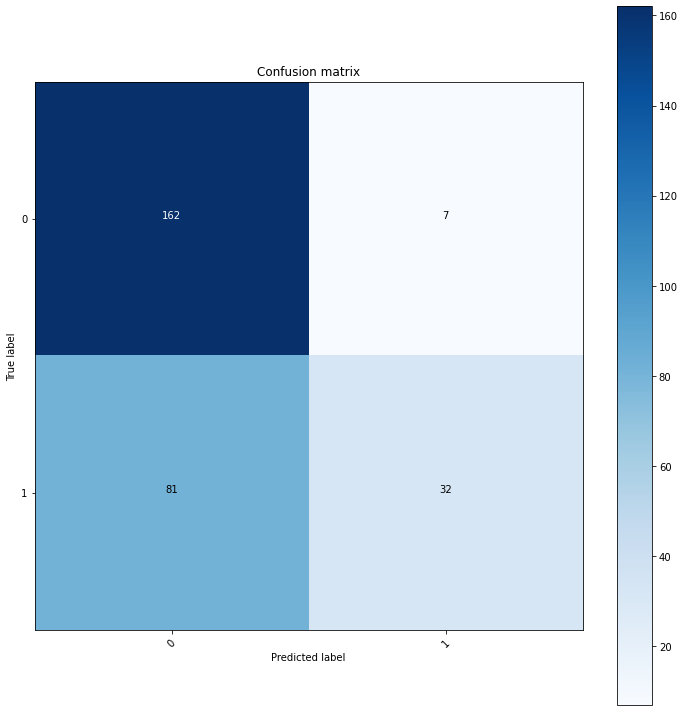

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat4, 4)["CM"], classes = [0, 1], filename = "results/CM_train_strat4.png");

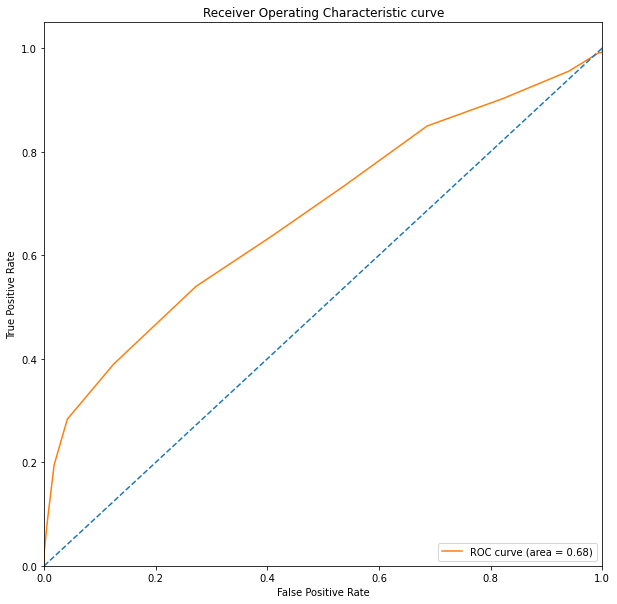

In [29]:
roc = get_metrics(train_result_strat4, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat4.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6338028169014085, 'FPR': 0.23404255319148937, 'AUC': 0.524822695035461, 'Ya': 0.45, 'EF': 1.33125, 'REF': 45.0} 
Strategy 2:  {'ACC': 0.647887323943662, 'FPR': 0.23404255319148937, 'AUC': 0.5226063829787234, 'Ya': 0.47619047619047616, 'EF': 1.4087301587301586, 'REF': 47.61904761904762} 
Strategy 3:  {'ACC': 0.6901408450704225, 'FPR': 0.1276595744680851, 'AUC': 0.5257092198581561, 'Ya': 0.5714285714285714, 'EF': 1.6904761904761905, 'REF': 57.142857142857146} 
Strategy 4:  {'ACC': 0.7323943661971831, 'FPR': 0.06382978723404255, 'AUC': 0.5536347517730495, 'Ya': 0.7272727272727273, 'EF': 2.151515151515152, 'REF': 72.72727272727273}


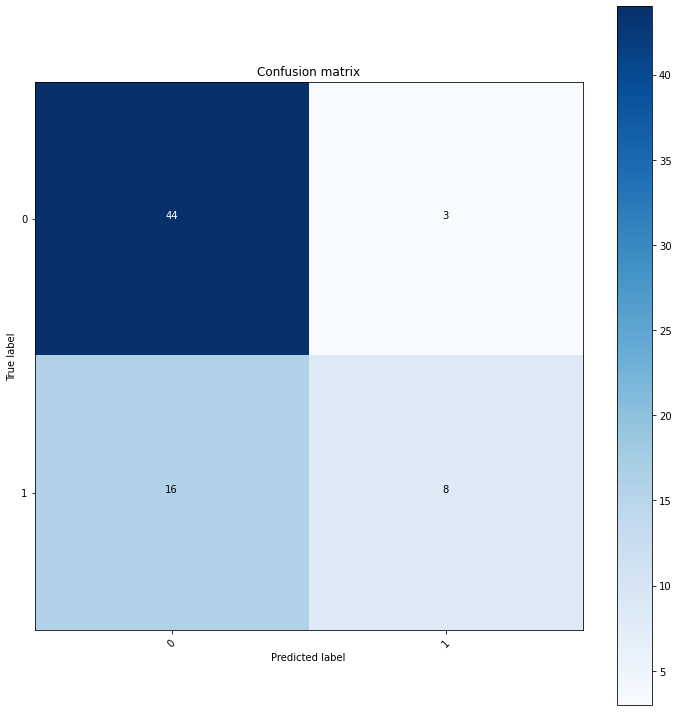

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat4, 4)["CM"], classes = [0, 1], filename = "results/CM_val_strat4.png");

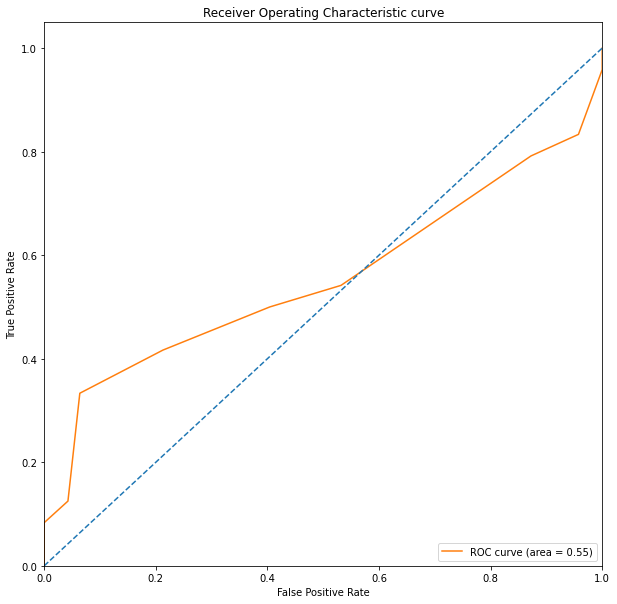

In [32]:
roc = get_metrics(val_result_strat4, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat4.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 4, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6629213483146067, 'FPR': 0.1724137931034483, 'AUC': 0.6382091212458287, 'Ya': 0.5238095238095238, 'EF': 1.5038402457757296, 'REF': 52.38095238095238} 
Strategy 2:  {'ACC': 0.6741573033707865, 'FPR': 0.1724137931034483, 'AUC': 0.6415461624026696, 'Ya': 0.5454545454545454, 'EF': 1.5659824046920818, 'REF': 54.54545454545455} 
Strategy 3:  {'ACC': 0.7191011235955056, 'FPR': 0.034482758620689655, 'AUC': 0.7018909899888766, 'Ya': 0.8, 'EF': 2.296774193548387, 'REF': 80.0} 
Strategy 4:  {'ACC': 0.7303370786516854, 'FPR': 0.0, 'AUC': 0.71412680756396, 'Ya': 1.0, 'EF': 2.8709677419354835, 'REF': 100.0}


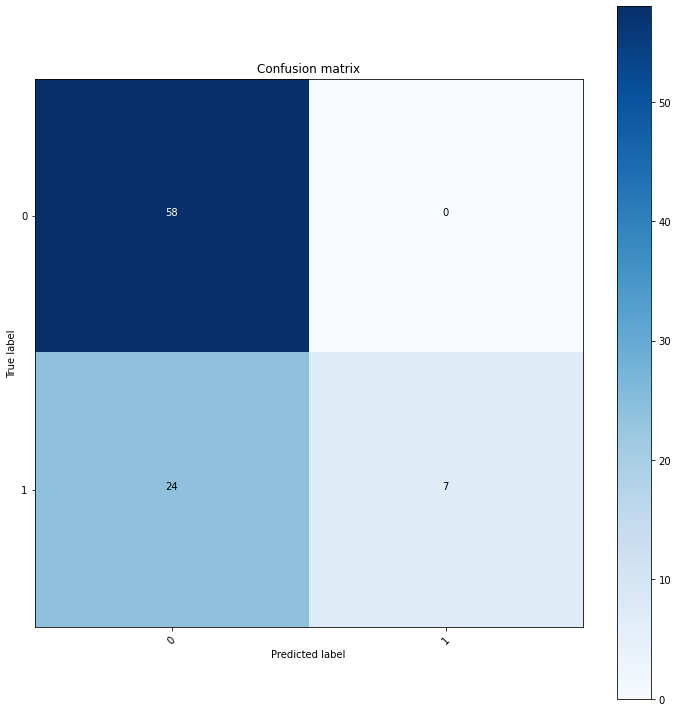

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat4, 4)["CM"], classes = [0, 1], filename = "results/CM_test_strat4.png");

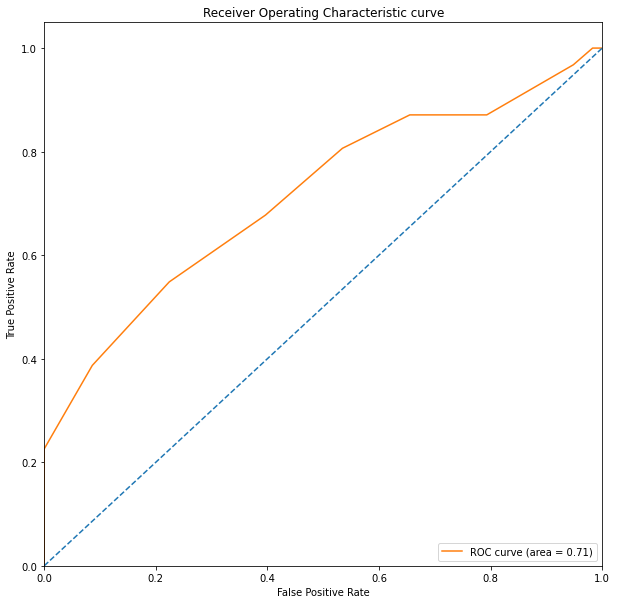

In [35]:
roc = get_metrics(test_result_strat4, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat4.png");

#### **Clean up:**

In [36]:
os.remove("PIAScore.py")